In [2]:
import numpy as np
import pandas as pd
import pymc as pm
import nutpie
import arviz as az
import pytensor.tensor as at
import matplotlib.pyplot as plt
from util import build_XY

In [3]:
gp_samples = az.InferenceData.from_netcdf("./mogp.nc")

In [4]:
gp_samples

Inference data with groups:
	> posterior_predictive
	> observed_data

In [5]:
n_outputs = 3
country_mapping = {"US":0, "UK":1, "AU":2} 
M = 90
x_new = np.linspace(0, M, M)[:, None]
X_new, _, _ = build_XY([x_new for idx in range(n_outputs)])
X_new.shape

(270, 2)

In [6]:
X_new

array([[ 0.        ,  0.        ],
       [ 1.01123596,  0.        ],
       [ 2.02247191,  0.        ],
       [ 3.03370787,  0.        ],
       [ 4.04494382,  0.        ],
       [ 5.05617978,  0.        ],
       [ 6.06741573,  0.        ],
       [ 7.07865169,  0.        ],
       [ 8.08988764,  0.        ],
       [ 9.1011236 ,  0.        ],
       [10.11235955,  0.        ],
       [11.12359551,  0.        ],
       [12.13483146,  0.        ],
       [13.14606742,  0.        ],
       [14.15730337,  0.        ],
       [15.16853933,  0.        ],
       [16.17977528,  0.        ],
       [17.19101124,  0.        ],
       [18.20224719,  0.        ],
       [19.21348315,  0.        ],
       [20.2247191 ,  0.        ],
       [21.23595506,  0.        ],
       [22.24719101,  0.        ],
       [23.25842697,  0.        ],
       [24.26966292,  0.        ],
       [25.28089888,  0.        ],
       [26.29213483,  0.        ],
       [27.30337079,  0.        ],
       [28.31460674,

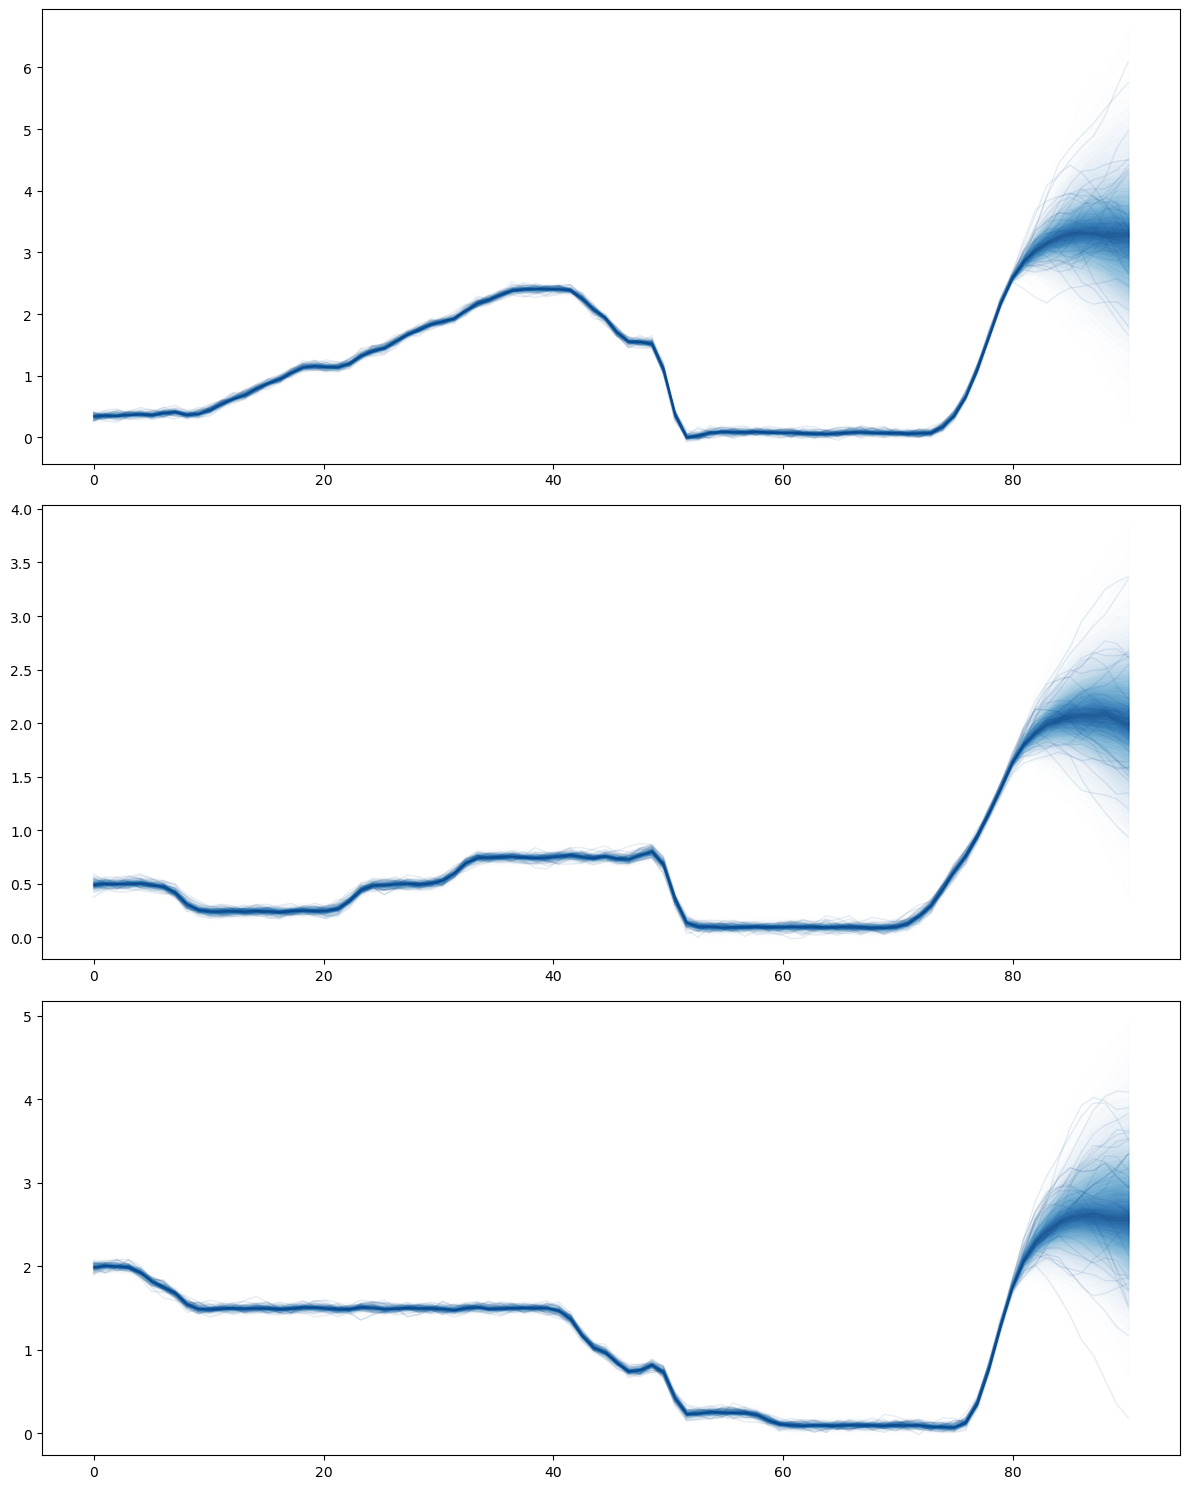

In [7]:
from pymc.gp.util import plot_gp_dist

f_pred = gp_samples.posterior_predictive["preds"].sel(chain=0)
fig, axes = plt.subplots(n_outputs,1, figsize=(12,15))

for idx, country in enumerate(country_mapping.keys()):
    # Prediction
    plot_gp_dist(axes[idx], f_pred[:,M*idx:M*(idx+1)], 
                 X_new[M*idx:M*(idx+1),0], 
                 palette="Blues", fill_alpha=0.1, samples_alpha=0.1)    
    # Train data points
#     cond = adf["country"] == country
#     axes[idx].scatter(adf.loc[cond, "x"], adf.loc[cond, "rate"], color='r')
#     axes[idx].set_title(country)
plt.tight_layout()